**Installing Libraries**

In [ ]:
!pip install tensorflow keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

In [ ]:
from tensorflow.keras.datasets import mnist

**Load and Split the Dataset**

In [ ]:
# Load the MNIST dataset and split into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Reshape and Normalize pixel values**

In [ ]:
# Reshape the images to (28, 28, 1) and normalize pixel values
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

**One Hot Encoding**

In [ ]:
# One-hot encode the labels
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

**Building Model**

In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),  # Flatten the input images
    layers.Dense(128, activation='relu'),     # First hidden layer with 128 neurons
    layers.Dense(64, activation='relu'),      # Second hidden layer with 64 neurons
    layers.Dense(10, activation='softmax')    # Output layer with 10 neurons (one for each digit)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Compile the Model**

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Training the Model**

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8145 - loss: 0.6626 - val_accuracy: 0.9493 - val_loss: 0.1846
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9568 - loss: 0.1551 - val_accuracy: 0.9599 - val_loss: 0.1351
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9701 - loss: 0.1036 - val_accuracy: 0.9663 - val_loss: 0.1156
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9784 - loss: 0.0741 - val_accuracy: 0.9703 - val_loss: 0.0995
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9839 - loss: 0.0565 - val_accuracy: 0.9730 - val_loss: 0.0964
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9872 - loss: 0.0426 - val_accuracy: 0.9728 - val_loss: 0.0970
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9900 - loss: 0.0352 - val_accuracy: 0.9757 - val_loss: 0.0903
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9927 - loss: 0.0269 - val_accuracy: 0.

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9714 - loss: 0.0984
Test accuracy: 0.9762


**Making Predictions**

In [ ]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


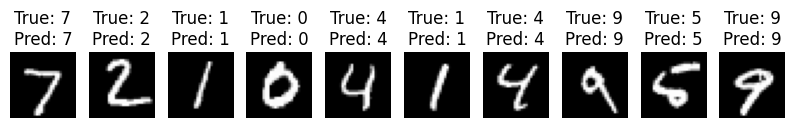

In [ ]:
def plot_images_with_predictions(images, true_labels, predictions, num_images=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {np.argmax(true_labels[i])}\nPred: {np.argmax(predictions[i])}")
        plt.axis('off')
    plt.show()

# Display the first 10 test images along with their predicted labels
plot_images_with_predictions(x_test, y_test, predictions, num_images=10)